Names: Apoorva Asgekar, Udita Katrolia, Devika Pillai

Roll numbers: C006, C022, C031

Program /Branch: Btech EXTC

Semester: VIII

# **Deep Learning Minor Project - Image Caption Generation using CNN+LSTM**

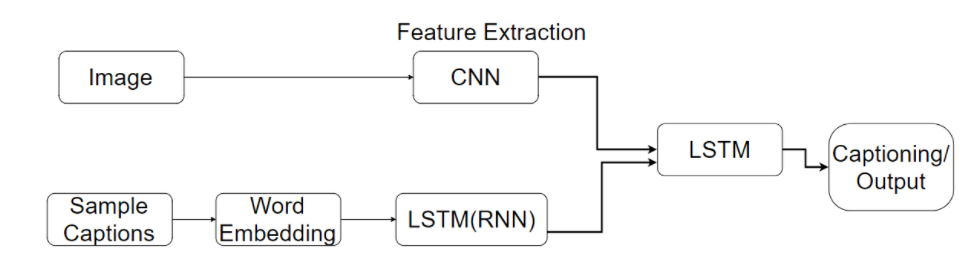

## Importing the required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import string
import cv2

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Data Visualization and Preprocessing**

## Visualizing the Image Dataset:

In [ ]:
#checking the number of images in the dataset:

l=os.listdir("/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset")
print(len(l))

8091


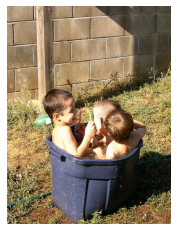

In [ ]:
#visualising one of the train images

img_path = "/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
img = cv2.imread(img_path + "/"+"1362128028_8422d53dc4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

## Reading Text Captions

In [ ]:
# Function to read the text file using its path from the drive

def readTextFile(path):
    with open(path) as f:
        captions = f.read()
    return captions

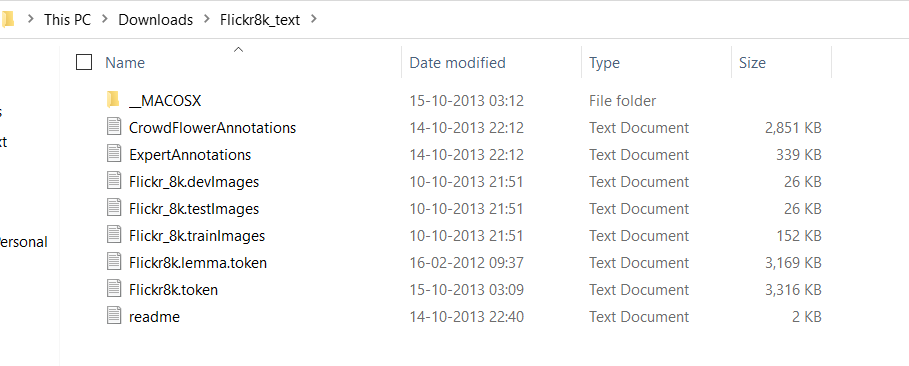

In [ ]:
# Reading the complete file having image names and image captions

captions=readTextFile("/content/drive/MyDrive/ImageCaptionGeneration/Flickr8k_text/Flickr8k.lemma.token.txt")
captions = captions.split('\n')[:-1]

In [ ]:
#Understanding how captions are stored in the text file

first,second  = captions[10].split('\t')
print(first)
print(second)

1358089136_976e3d2e30.jpg#0
A boy sand surf down a hill


## Creating a Dictionary to Map each image with the list of captions it has


In [ ]:
# Conditional loop to group all captions with their particular image

descriptions = {}
for i in captions:
    first,second = i.split('\t')
    image_name = first.split(".")[0]
    # checking if the image id is already present or not
    if descriptions.get(image_name) is None:
        descriptions[image_name] = []
    descriptions[image_name].append(second)

In [ ]:
descriptions["1362128028_8422d53dc4"]

['kid play in a blue tub full of water outside',
 'On a hot day , three small kid sit in a big container fill with water .',
 'Little kid sit outdoors in a small tub of water .',
 'Three child squeeze into a plastic tub fill with water and play .',
 'Three little boy take a bath in a rubber bin on the grass .']

## Data Cleaning

In [ ]:
# Function to convert all alphabets to lowercase, Remove any cahrachter other than an alphabet, Remove words like 'a' that are not important to the learning process

import re
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]", " ", sentence)
    sentence = sentence.split()
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [ ]:
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [ ]:
descriptions["1362128028_8422d53dc4"]

['kid play in blue tub full of water outside',
 'on hot day three small kid sit in big container fill with water',
 'little kid sit outdoors in small tub of water',
 'three child squeeze into plastic tub fill with water and play',
 'three little boy take bath in rubber bin on the grass']

## Understanding the created Description set

Total No of words across all the sentences:

In [ ]:
total_words = []
for key in descriptions.keys():
  for x in descriptions[key]:
    for i in x.split():
      total_words.append(i)

print("Total Words" , len(total_words))

Total Words 366137


In [ ]:
total_words

['man',
 'in',
 'street',
 'racer',
 'armor',
 'be',
 'examine',
 'the',
 'tire',
 'of',
 'another',
 'racer',
 'motorbike',
 'two',
 'racer',
 'drive',
 'white',
 'bike',
 'down',
 'road',
 'two',
 'motorist',
 'be',
 'ride',
 'along',
 'on',
 'their',
 'vehicle',
 'that',
 'be',
 'oddly',
 'design',
 'and',
 'color',
 'two',
 'person',
 'be',
 'in',
 'small',
 'race',
 'car',
 'drive',
 'by',
 'green',
 'hill',
 'two',
 'person',
 'in',
 'race',
 'uniform',
 'in',
 'street',
 'car',
 'firefighter',
 'extinguish',
 'fire',
 'under',
 'the',
 'hood',
 'of',
 'car',
 'fireman',
 'spray',
 'water',
 'into',
 'the',
 'hood',
 'of',
 'small',
 'white',
 'car',
 'on',
 'jack',
 'fireman',
 'spray',
 'inside',
 'the',
 'open',
 'hood',
 'of',
 'small',
 'white',
 'car',
 'on',
 'jack',
 'fireman',
 'use',
 'firehose',
 'on',
 'car',
 'engine',
 'that',
 'be',
 'up',
 'on',
 'carjack',
 'firefighter',
 'use',
 'water',
 'to',
 'extinguish',
 'car',
 'that',
 'be',
 'on',
 'fire',
 'boy',
 'sa

In [ ]:
#Creating a dictionary to count the number of times a word occurs

from collections import Counter

counter = Counter(total_words)
freq_cnt = dict(counter)
freq_cnt

{'man': 8296,
 'in': 18984,
 'street': 972,
 'racer': 66,
 'armor': 2,
 'be': 13268,
 'examine': 22,
 'the': 10725,
 'tire': 125,
 'of': 6723,
 'another': 956,
 'motorbike': 46,
 'two': 5640,
 'drive': 147,
 'white': 3959,
 'bike': 982,
 'down': 1841,
 'road': 399,
 'motorist': 1,
 'ride': 1638,
 'along': 527,
 'on': 10747,
 'their': 693,
 'vehicle': 101,
 'that': 397,
 'oddly': 2,
 'design': 6,
 'and': 8866,
 'color': 58,
 'person': 3973,
 'small': 1345,
 'race': 657,
 'car': 494,
 'by': 1249,
 'green': 1235,
 'hill': 478,
 'uniform': 385,
 'firefighter': 10,
 'extinguish': 3,
 'fire': 124,
 'under': 246,
 'hood': 40,
 'fireman': 9,
 'spray': 94,
 'water': 2821,
 'into': 1074,
 'jack': 18,
 'inside': 174,
 'open': 222,
 'use': 104,
 'firehose': 2,
 'engine': 5,
 'up': 1277,
 'carjack': 1,
 'to': 3177,
 'boy': 4247,
 'sand': 468,
 'surf': 207,
 'attempt': 130,
 'make': 343,
 'sunny': 66,
 'day': 139,
 'slide': 516,
 'huge': 94,
 'dune': 34,
 'young': 2673,
 'short': 449,
 'shirt': 2092

In [ ]:
# Arranging the above dictionary in descending order of the word count

sorted_freq_cnt = sorted(freq_cnt.values(),reverse=True)
sorted_dict = {}

for i in sorted_freq_cnt:
    for k in freq_cnt.keys():
        if freq_cnt[k] == i:
            sorted_dict[k] = freq_cnt[k]
            break

print(sorted_dict)

{'in': 18984, 'be': 13268, 'on': 10747, 'the': 10725, 'dog': 10263, 'and': 8866, 'man': 8296, 'with': 7765, 'of': 6723, 'two': 5640, 'boy': 4247, 'girl': 4169, 'woman': 4055, 'person': 3973, 'white': 3959, 'black': 3848, 'run': 3378, 'play': 3301, 'wear': 3230, 'stand': 3178, 'to': 3177, 'at': 2916, 'jump': 2885, 'water': 2821, 'child': 2701, 'red': 2687, 'young': 2673, 'an': 2578, 'his': 2357, 'sit': 2302, 'blue': 2280, 'shirt': 2092, 'through': 2051, 'walk': 2038, 'while': 1968, 'hold': 1949, 'ball': 1849, 'down': 1841, 'little': 1768, 'ride': 1638, 'grass': 1625, 'snow': 1554, 'look': 1520, 'over': 1414, 'three': 1389, 'front': 1385, 'small': 1345, 'field': 1289, 'up': 1277, 'large': 1273, 'by': 1249, 'green': 1235, 'group': 1223, 'one': 1221, 'yellow': 1218, 'her': 1180, 'into': 1074, 'air': 1062, 'beach': 1047, 'mouth': 1034, 'near': 1030, 'rock': 1022, 'player': 1021, 'dress': 990, 'bike': 982, 'street': 972, 'another': 956, 'for': 952, 'its': 925, 'from': 920, 'as': 868, 'climb'

<BarContainer object of 30 artists>

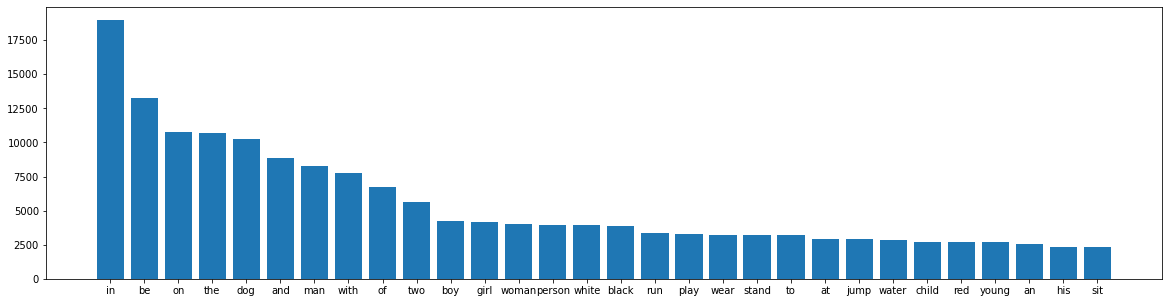

In [ ]:
#Bar Plot for the 30 top most occuring words

names = list(sorted_dict.keys())[:30]
values = list(sorted_dict.values())[:30]
plt.figure(figsize=(20,5))
plt.bar(range(len(names)), values, tick_label=names)

# **Data PreProcessing For Captions**

In [ ]:
print("Total Words" , len(total_words))

Total Words 366137


Vocabulary:

In [ ]:
vocab = set()
for i in descriptions.keys():
  for sentence in descriptions[i]:
    vocab.update(sentence.split())

vocab

{'orb',
 'coiled',
 'crazy',
 'jostle',
 'shirtness',
 'barge',
 'canvas',
 'footbride',
 'doggy',
 'headlamp',
 'thousand',
 'what',
 'jumpropes',
 'progress',
 'interested',
 'ponytail',
 'musher',
 'handstand',
 'worm',
 'streaked',
 'election',
 'navel',
 'ring',
 'care',
 'silverware',
 'lettuce',
 'headcover',
 'clip',
 'aquarium',
 'outfut',
 'romp',
 'basett',
 'identical',
 'towel',
 'vibrate',
 'turquiose',
 'york',
 'catch',
 'closer',
 'use',
 'above',
 'illustration',
 'bruised',
 'shelton',
 'somersault',
 'superman',
 'unconventional',
 'naturally',
 'subdivsion',
 'index',
 'flexable',
 'speaks',
 'bunk',
 'stain',
 'maker',
 'mountin',
 'pebbly',
 'cannot',
 'pane',
 'terminal',
 'agains',
 'spar',
 'armful',
 'chrismas',
 'patio',
 'perfom',
 'pat',
 'racetrack',
 'beg',
 'ladle',
 'playtoy',
 'enough',
 'helment',
 'yerba',
 'trows',
 'wipe',
 'apportion',
 'handle',
 'coliding',
 'parkinglot',
 'aluminum',
 'rummage',
 'rover',
 'patch',
 'focus',
 'still',
 'tank',

In [ ]:
print("Vocab Size : %d"% len(vocab))

Vocab Size : 6377


In [ ]:
# Procurring the words with occurance of more than 10 from the sorted dictionary used in caption data EDA
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

total_words=[]
threshold = 10

sorted_freq_cnt  = [x for x in sorted_freq_cnt if x[1]>threshold]
total_words = [x[0] for x in sorted_freq_cnt]

print(len(total_words))

1491


In [ ]:
word_to_idx = {}
idx_to_word = {}
for i,word in enumerate(freq_cnt.keys()):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word

print(word_to_idx)
print(idx_to_word)

{'man': 1, 'in': 2, 'street': 3, 'racer': 4, 'armor': 5, 'be': 6, 'examine': 7, 'the': 8, 'tire': 9, 'of': 10, 'another': 11, 'motorbike': 12, 'two': 13, 'drive': 14, 'white': 15, 'bike': 16, 'down': 17, 'road': 18, 'motorist': 19, 'ride': 20, 'along': 21, 'on': 22, 'their': 23, 'vehicle': 24, 'that': 25, 'oddly': 26, 'design': 27, 'and': 28, 'color': 29, 'person': 30, 'small': 31, 'race': 32, 'car': 33, 'by': 34, 'green': 35, 'hill': 36, 'uniform': 37, 'firefighter': 38, 'extinguish': 39, 'fire': 40, 'under': 41, 'hood': 42, 'fireman': 43, 'spray': 44, 'water': 45, 'into': 46, 'jack': 47, 'inside': 48, 'open': 49, 'use': 50, 'firehose': 51, 'engine': 52, 'up': 53, 'carjack': 54, 'to': 55, 'boy': 56, 'sand': 57, 'surf': 58, 'attempt': 59, 'make': 60, 'sunny': 61, 'day': 62, 'slide': 63, 'huge': 64, 'dune': 65, 'young': 66, 'short': 67, 'shirt': 68, 'snowboard': 69, 'bright': 70, 'blue': 71, 'sky': 72, 'kid': 73, 'play': 74, 'tub': 75, 'full': 76, 'outside': 77, 'hot': 78, 'three': 79, 

In [ ]:
idx_to_word[6378] = '<start>'
word_to_idx['<start>'] = 6378

idx_to_word[6379] = '<ends>'
word_to_idx['<ends>'] = 6379
vocab_size = len(word_to_idx) + 1
print("Vocab Size",vocab_size)

Vocab Size 6380


In [ ]:
print(word_to_idx)
print(idx_to_word)

{'man': 1, 'in': 2, 'street': 3, 'racer': 4, 'armor': 5, 'be': 6, 'examine': 7, 'the': 8, 'tire': 9, 'of': 10, 'another': 11, 'motorbike': 12, 'two': 13, 'drive': 14, 'white': 15, 'bike': 16, 'down': 17, 'road': 18, 'motorist': 19, 'ride': 20, 'along': 21, 'on': 22, 'their': 23, 'vehicle': 24, 'that': 25, 'oddly': 26, 'design': 27, 'and': 28, 'color': 29, 'person': 30, 'small': 31, 'race': 32, 'car': 33, 'by': 34, 'green': 35, 'hill': 36, 'uniform': 37, 'firefighter': 38, 'extinguish': 39, 'fire': 40, 'under': 41, 'hood': 42, 'fireman': 43, 'spray': 44, 'water': 45, 'into': 46, 'jack': 47, 'inside': 48, 'open': 49, 'use': 50, 'firehose': 51, 'engine': 52, 'up': 53, 'carjack': 54, 'to': 55, 'boy': 56, 'sand': 57, 'surf': 58, 'attempt': 59, 'make': 60, 'sunny': 61, 'day': 62, 'slide': 63, 'huge': 64, 'dune': 65, 'young': 66, 'short': 67, 'shirt': 68, 'snowboard': 69, 'bright': 70, 'blue': 71, 'sky': 72, 'kid': 73, 'play': 74, 'tub': 75, 'full': 76, 'outside': 77, 'hot': 78, 'three': 79, 

In [ ]:
word_to_idx["Unk"]=0
idx_to_word[0]="Unk"

## Analyzing and Preparing the Train, Test , Validation Data using Text files

In [ ]:
train_image_names=readTextFile("/content/drive/MyDrive/ImageCaptionGeneration/Flickr8k_text/Flickr_8k.trainImages.txt")
train_image_names= train_image_names.split("\n")[:-1]
test_image_names=readTextFile("/content/drive/MyDrive/ImageCaptionGeneration/Flickr8k_text/Flickr_8k.testImages.txt")
test_image_names= test_image_names.split("\n")[:-1]
val_image_names=readTextFile("/content/drive/MyDrive/ImageCaptionGeneration/Flickr8k_text/Flickr_8k.devImages.txt")
val_image_names= val_image_names.split("\n")[:-1]

In [ ]:
#Creating lists from the read files for storing the names / image id's in each of teh files

train=[]
test=[]
val=[]
for i in train_image_names:
  train.append(i.split(".")[0])

for i in test_image_names:
  test.append(i.split(".")[0])

for i in val_image_names:
  val.append(i.split(".")[0])

In [ ]:
train[:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [ ]:
# Prepare Description for the Training Data by matching the id's in the train list with that in the description set
# Also adding start and end at the beginning and finish of each caption to make every caption individually detectable

train_descriptions = {}
for imgid in train:
    train_descriptions[imgid] = []
    for cap in descriptions[imgid]:
        cap_to_append = "<start> " + cap + " <ends>"
        train_descriptions[imgid].append(cap_to_append)

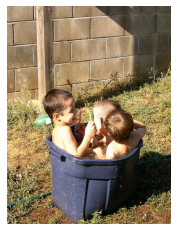

In [ ]:
img_path = "/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
img = cv2.imread(img_path + "/"+"1362128028_8422d53dc4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
train_descriptions["1362128028_8422d53dc4"]

['<start> kid play in blue tub full of water outside <ends>',
 '<start> on hot day three small kid sit in big container fill with water <ends>',
 '<start> little kid sit outdoors in small tub of water <ends>',
 '<start> three child squeeze into plastic tub fill with water and play <ends>',
 '<start> three little boy take bath in rubber bin on the grass <ends>']

In [ ]:
# Prepare Description for the Testing Data by matching the id's in the test list with that in the description set

test_descriptions = {}
for imgid in test:
    test_descriptions[imgid] = []
    for cap in descriptions[imgid]:
        cap_to_append = "<start> " + cap + " <ends>"
        test_descriptions[imgid].append(cap_to_append)

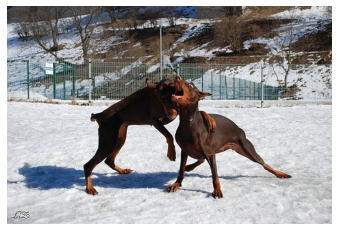

In [ ]:
img_path = "/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
img = cv2.imread(img_path + "/"+"3385593926_d3e9c21170.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
test_descriptions["3385593926_d3e9c21170"]

['<start> dog be in the snow in front of fence <ends>',
 '<start> dog play on the snow <ends>',
 '<start> two brown dog playful fight in the snow <ends>',
 '<start> two brown dog wrestle in the snow <ends>',
 '<start> two dog play in the snow <ends>']

In [ ]:
# Prepare Description for the Validation Data by matching the id's in the validation list with that in the description set

val_descriptions = {}
for imgid in val:
    val_descriptions[imgid] = []
    for cap in descriptions[imgid]:
        cap_to_append = "<start> " + cap + " <ends>"
        val_descriptions[imgid].append(cap_to_append)

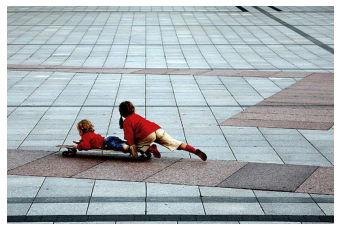

In [ ]:
img_path = "/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
img = cv2.imread(img_path + "/"+"2090545563_a4e66ec76b.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
val_descriptions["2090545563_a4e66ec76b"]

['<start> the boy lay face down on skateboard be be push along the ground by another boy <ends>',
 '<start> two girl play on skateboard in courtyard <ends>',
 '<start> two person play on long skateboard <ends>',
 '<start> two small child in red shirt play on skateboard <ends>',
 '<start> two young child on skateboard go across sidewalk <ends>']

# **Transfer learning Using VGG16 Algorithm**

In [ ]:
import tensorflow
from keras.applications.vgg16 import VGG16

In [ ]:
# Using teh VGG16 Algorithm for encoding images - VGG-16 Net Pre-trained on ImageNet

modelvgg = VGG16(weights='imagenet',include_top=True,pooling='avg',input_shape=(224,224,3),classifier_activation='softmax')
modelvgg.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### VGG-16 Net as Feature Extractor:
The 'predictions(Dense)' that is the output layer of the above VGG-16 Net contains 1000 o/p's as it was used for classification on 1000 different classes. But since we are using VGG-16 Net as a Feature Extractor in Transfer Learning, we will remove the last layer (the one used in classification). This Net takes an image of size (224, 224, 3).

In [ ]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output) # Removing Last Layer of VGG-16 Pretrained Net
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# **Encoding images and forming dictionaries containing mapping of image_id to image features**

In [ ]:
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.applications.vgg16 import preprocess_input

In [ ]:
import pickle

In [ ]:
#extracting image encodings(features) from vgg16 and forming dict train_features
path="/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
train_features={}
c=0
for image_name in (train_descriptions):
  img_path=path+"/"+image_name+".jpg"
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = modelvgg.predict(x)
  train_features[image_name]=features.squeeze()

In [ ]:
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_features, pickle_f )

In [ ]:
#extracting image encodings(features) from vgg16 and forming dict test_features
path="/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
test_features={}
c=0
for image_name in (test_descriptions):
  img_path=path+"/"+image_name+".jpg"
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = modelvgg.predict(x)
  test_features[image_name]=features.squeeze()

In [ ]:
with open( "test_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(test_features, pickle_f )

In [ ]:
#extracting image encodings(features) from vgg16 and forming dict validation_features
path="/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"
validation_features={}
c=0
for image_name in (val_descriptions):
  img_path=path+"/"+image_name+".jpg"
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = modelvgg.predict(x)
  validation_features[image_name]=features.squeeze()

In [ ]:
with open( "validation_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(validation_features, pickle_f )

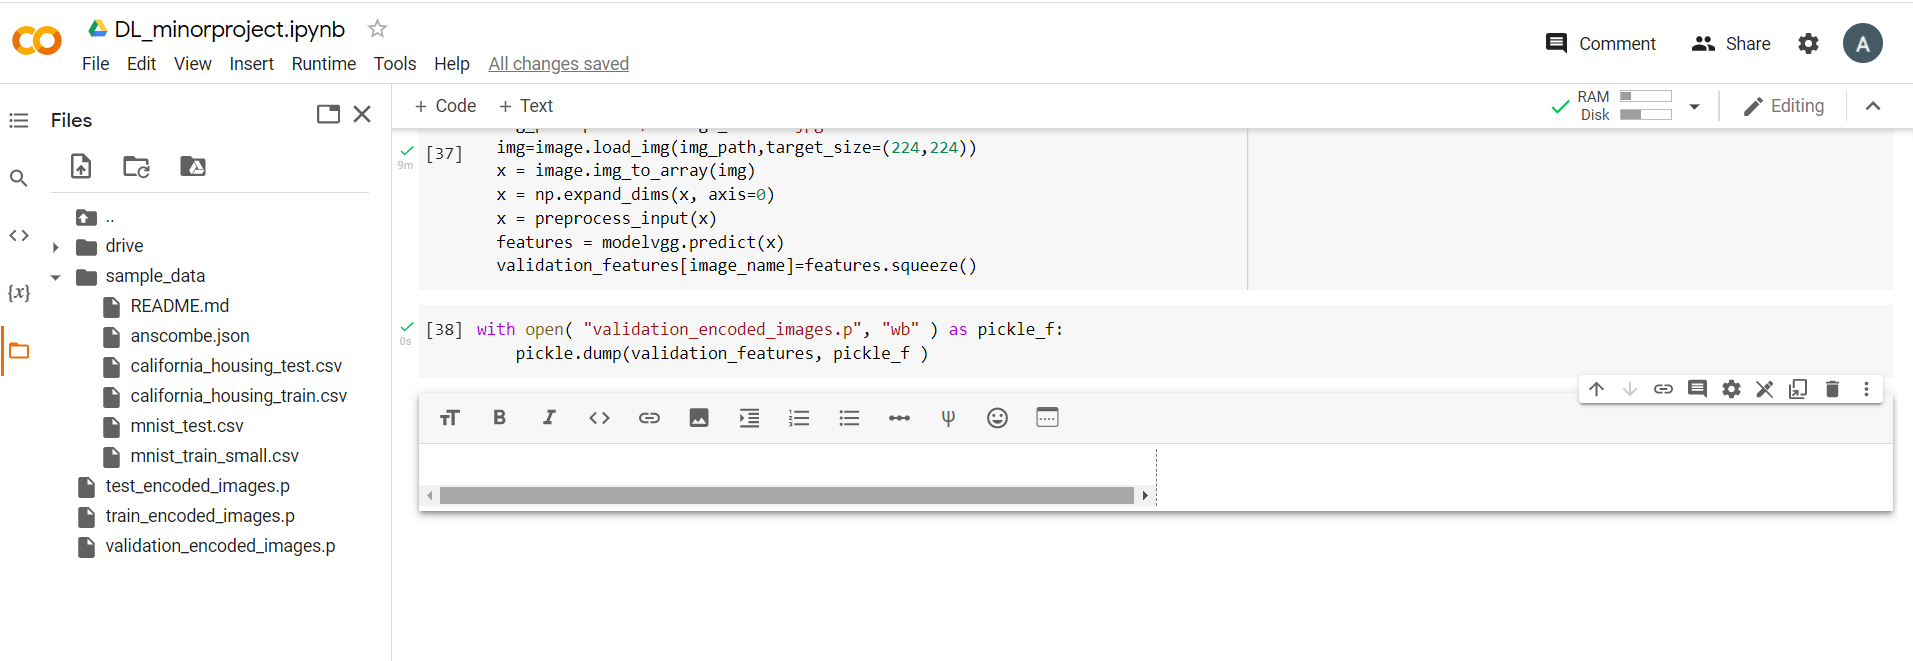

In [ ]:
# Calculating teh total number of words in all the captions
all_captions=[]
for img_id in train_descriptions:
  for captions in train_descriptions[img_id]:
    all_captions.append(captions)

all_words=" ".join(all_captions)
print()
print(len(all_words))
unique_words=list(set(all_words.strip().split(" ")))
print(len(unique_words))


1856817
5522


In [ ]:
# Defining maxlength of the vectors
max_length=40

In [ ]:
# Defining teh vocab size
vocab_size1 = len(word_to_idx) + 1
vocab_size1

6381

In [ ]:
train_encoded_captions={}
for img_id in train_descriptions:
  train_encoded_captions[img_id]=[]
  for i in range(5):
    train_encoded_captions[img_id].append([word_to_idx[s] for s in train_descriptions[img_id][i].split(" ")])

In [ ]:
for img_id in train_encoded_captions:
  print(train_encoded_captions[img_id])
  break

[[6378, 250, 535, 6, 540, 541, 15, 535, 2, 8, 111, 6379], [6378, 250, 535, 654, 411, 535, 100, 111, 6379], [6378, 13, 535, 654, 667, 204, 347, 8, 97, 468, 6379], [6378, 13, 535, 74, 426, 2, 8, 111, 6379], [6378, 13, 535, 540, 100, 174, 470, 235, 10, 45, 6379]]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
for img_id in train_encoded_captions:
  train_encoded_captions[img_id]=pad_sequences(train_encoded_captions[img_id], maxlen=max_length, padding='post')

In [ ]:
for img_id in train_encoded_captions:
  print(train_encoded_captions[img_id])
  break

[[6378  250  535    6  540  541   15  535    2    8  111 6379    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [6378  250  535  654  411  535  100  111 6379    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [6378   13  535  654  667  204  347    8   97  468 6379    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [6378   13  535   74  426    2    8  111 6379    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [6378   13  535  540  100  174  470  235   10   45 6379    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

In [ ]:
captions1=readTextFile("/content/drive/MyDrive/ImageCaptionGeneration/Flickr8k_text/Flickr_8k.trainImages.txt")

In [ ]:
captions1

'2513260012_03d33305cf.jpg\n2903617548_d3e38d7f88.jpg\n3338291921_fe7ae0c8f8.jpg\n488416045_1c6d903fe0.jpg\n2644326817_8f45080b87.jpg\n218342358_1755a9cce1.jpg\n2501968935_02f2cd8079.jpg\n2699342860_5288e203ea.jpg\n2638369467_8fc251595b.jpg\n2926786902_815a99a154.jpg\n2851304910_b5721199bc.jpg\n3423802527_94bd2b23b0.jpg\n3356369156_074750c6cc.jpg\n2294598473_40637b5c04.jpg\n1191338263_a4fa073154.jpg\n2380765956_6313d8cae3.jpg\n3197891333_b1b0fd1702.jpg\n3119887967_271a097464.jpg\n2276499757_b44dc6f8ce.jpg\n2506892928_7e79bec613.jpg\n2187222896_c206d63396.jpg\n2826769554_85c90864c9.jpg\n3097196395_ec06075389.jpg\n3603116579_4a28a932e2.jpg\n3339263085_6db9fd0981.jpg\n2532262109_87429a2cae.jpg\n2076906555_c20dc082db.jpg\n2502007071_82a8c639cf.jpg\n3113769557_9edbb8275c.jpg\n3325974730_3ee192e4ff.jpg\n1655781989_b15ab4cbff.jpg\n1662261486_db967930de.jpg\n2410562803_56ec09f41c.jpg\n2469498117_b4543e1460.jpg\n69710415_5c2bfb1058.jpg\n3414734842_beb543f400.jpg\n3006217970_90b42e6b27.jpg\n2192

In [ ]:
first= captions1.split('\n')
first[1]

'2903617548_d3e38d7f88.jpg'

In [ ]:
img_id=first[1].split('.jpg')
img_id[0]

'2903617548_d3e38d7f88'

In [ ]:
for x in train_encoded_captions[img_id[0]][2]:
  print(idx_to_word[x])

<start>
child
be
play
croquette
by
truck
<ends>
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk
Unk


In [ ]:
train_encoded_captions[img_id[0]][0][0:1].tolist()

[6378]

In [ ]:
from tensorflow.keras.utils import to_categorical
from numpy import array

In [ ]:
# Function for data generation using captions and encoded features
def data_generator(train_encoded_captions,train_features,num_of_photos):
  X1, X2, Y = list(), list(), list()
  max_length=40
  n=0
  for img_id in train_encoded_captions:
    n+=1
    for i in range(5):
      for j in range(1,40):
        curr_sequence=train_encoded_captions[img_id][i][0:j].tolist()
        next_word=train_encoded_captions[img_id][i][j]
        curr_sequence=pad_sequences([curr_sequence], maxlen=max_length, padding='post')[0]
        one_hot_next_word=to_categorical([next_word],vocab_size1)[0]
        X1.append(train_features[img_id])
        X2.append(curr_sequence)
        Y.append(one_hot_next_word)
    if(n==num_of_photos):
      yield [[array(X1), array(X2)], array(Y)]
      X1, X2, Y = list(), list(), list()
      n=0

In [ ]:
#importing dependencies
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers.merge import add
from keras.layers.embeddings import Embedding

In [ ]:
for i in train_features:
  print(train_features[i].shape)
  break

(4096,)


In [ ]:
#model
input_1=Input(shape=(4096,))
dropout_1=Dropout(0.2)(input_1)
dense1=Dense(256,activation='relu')(dropout_1)

input_2=Input(shape=(max_length,))
embedding_1=Embedding(vocab_size1,256)(input_2)
dropout_2=Dropout(0.2)(embedding_1)
lstm_1=LSTM(256)(dropout_2)

add_1=add([dense_1,lstm_1])
dense_2=Dense(256,activation='relu')(add_1)
dense_3=Dense(vocab_size1,activation='softmax')(dense_2)

model=Model(inputs=[input_1,input_2],outputs=dense_3)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 256)      1633536     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_2[0][0]']                
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs=2
no_of_photos=5
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=2,steps_per_epoch=steps*epochs,verbose=1)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


2400/2400 [==============================] - 4047s 2s/step - loss: 1.4241 - accuracy: 0.7747
Epoch 1/2
2400/2400 [==============================] - 4057s 2s/step - loss: 1.0927 - accuracy: 0.7922


In [ ]:
def greedy_search(photo):
  photo=photo.reshape(1,4096)
  photo = photo.astype('int32')
  in_text='<start>'
  for i in range(max_length):
    sequence = [word_to_idx[s] for s in in_text.split(" ") if s in word_to_idx]
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    print(sequence)
    y_pred = model.predict([photo,sequence],verbose=0)
    y_pred = np.argmax(y_pred[0])
    word = idx_to_word[y_pred]
    in_text += ' ' + word
    if word == '<ends>':
      break
  final = in_text.split()
  final = final[1:-1]
  #final = " ".join(final)
  return final

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
import cv2

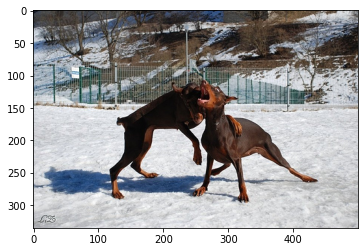

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6   74    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Referance Captions: 
dog be in the snow in front of fence
dog play on the snow
two brown dog playful fight in the snow
two brown dog wrestle in the snow
two dog play in the snow
Predicted Caption: 
dog be be play in the the the the
bleu score:  0.4153509237206396


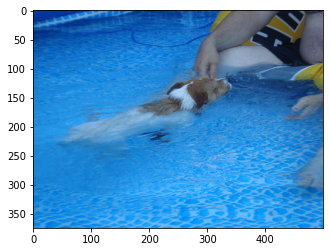

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


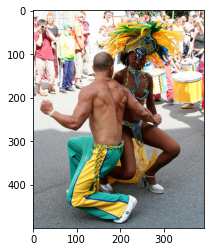

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Referance Captions: 
man and woman in festive costume dance
man and woman with feather on her head dance
man and woman wear decorative costume and dance in crowd of onlooker
one performer wear feathered headdress dance with another performer in street
two person be dance with drum on the right and crowd behind them
Predicted Caption: 
man in shirt be be be be be and be be shirt be shirt shirt and be shirt shirt shirt shirt blue the
bleu score:  0.7146704964214272


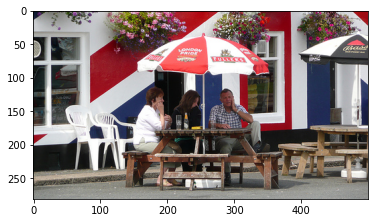

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  350    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  350    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  350    2  161    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  350    2  161  188    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

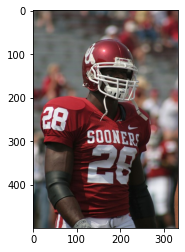

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  209    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  209  118    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  209  118    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  209  118    6    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

In [ ]:
i=0
for img_id in test_features:
  i+=1
  img=cv2.imread("/content/drive/MyDrive/ImageCaptionGeneration/Flicker8k_Dataset"+ "/" + img_id+".jpg")
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_descriptions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate=greedy_search(photo)
  score = sentence_bleu(reference, candidate)
  print("Referance Captions: ")
  for cap in reference:
    print(" ".join(cap))
  print("Predicted Caption: ")
  print(" ".join(candidate))
  print("bleu score: ",score)
  if(i==5):
    break

In [ ]:
i=0
tot_score=0
for img_id in test_features:
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_descriptions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate=greedy_search(photo)
  score = sentence_bleu(reference, candidate)
  tot_score+=score
avg_score=tot_score/i
print()
print("Bleu score on Greedy search")
print("Score: ",avg_score)

[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6   74    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


[[6378  535    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    6    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    6    6    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


[[6378    1    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    6    6    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    2   68    6    6    6    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Streaming output truncated to the last 5000 lines.
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    6    6    6  535    2    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378  535    6    6    6    6    6    6  535    2 1070    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]
[[6378    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    

# **Conclusion:**
As we can see above the BLEU score between the predicted and the reference captions. Since the dataset is small with only 4096 feature vectors in the training feature input we see that the BLEU score is a little low. The training accuracy that is 79.22% can be improved by increasing teh dataset by augmenting it and then running for more epochs. Fro now we have shown the predicted and reference caption outputs for a few images in the testing dataset as well as their accuracies. From this project we have learnt about various image and text compression techniques as well as feature extraction from the images given to us.